# Importing Libraries

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

# Loading data

In [2]:
from hitters_data import *

In [3]:
# Creating contiguous arrays

In [4]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Defining hyperparameters

In [5]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "warm_start":True,
    "oob_score":True,
    "random_state": 42,
}

# Fitting Model

In [6]:
reg =RandomForestRegressor(**params)

reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, min_samples_split=5, n_estimators=500,
                      oob_score=True, random_state=42, warm_start=True)

# Making predictions

In [7]:
y_pred = reg.predict(X_test)


# Calculating MSE

In [8]:
mean_squared_error(y_test, y_pred, squared=False)

296.37036964432764

# Implementing feature importance 

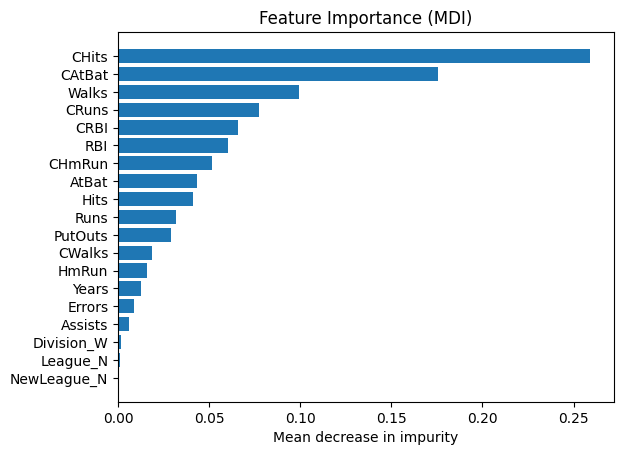

In [9]:
# obtain feature importance
feature_importance = reg.feature_importances_

# sort features according to importance
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])

# plot feature importances
plt.barh(pos, feature_importance[sorted_idx], align="center")

plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.title("Feature Importance (MDI)")
plt.xlabel("Mean decrease in impurity");


In [10]:
feature_importance

array([0.04310536, 0.0412164 , 0.01564725, 0.0317922 , 0.06051912,
       0.09936334, 0.01253101, 0.17554082, 0.25931584, 0.05158055,
       0.07754375, 0.06579112, 0.01865008, 0.02918583, 0.00609077,
       0.00864306, 0.00098941, 0.00179912, 0.00069496])

In [11]:
sorted_idx

array([18, 16, 17, 14, 15,  6,  2, 12, 13,  3,  1,  0,  9,  4, 11, 10,  5,
        7,  8], dtype=int64)

# Permutation feature importance

In [12]:
result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

tree_importances = pd.Series(result.importances_mean, index=feature_names)

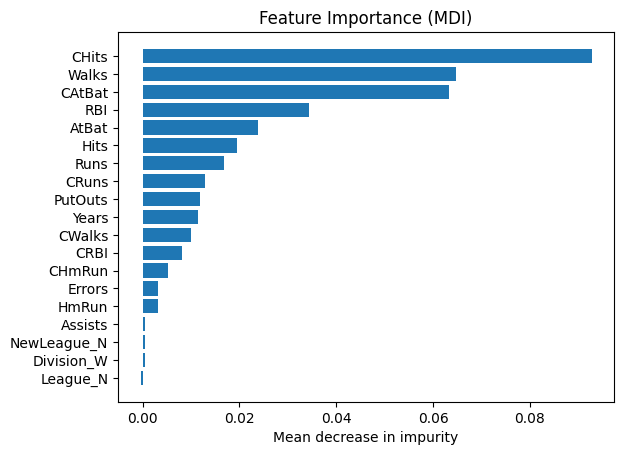

In [13]:
# sort features according to importance
sorted_idx = np.argsort(tree_importances)
pos = np.arange(sorted_idx.shape[0])

# plot feature importances
plt.barh(pos, tree_importances[sorted_idx], align="center")

plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.title("Feature Importance (MDI)")
plt.xlabel("Mean decrease in impurity");

# Box plot of Permutation feature importance

Text(0.5, 1.0, 'Permutation Importance (test set)')

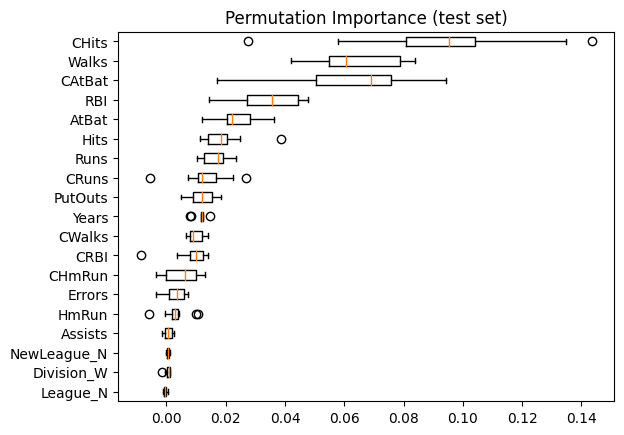

In [14]:
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(feature_names)[sorted_idx],
)

plt.title("Permutation Importance (test set)")

In [15]:
df.head()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


Above we created a random forest regression model over the salary column. Now suppose we want to create a classification random forest model for whether or not a player is in top 50% or bottom 50% of salaries. 

To do that we first need to find the 50th percentile of the salary column.

In [18]:
a = df['Salary'].quantile(.5)
a


425.0

Next we create a new column that will assing the value 1 if the salary of a player is more than the 50th percentile and 0 if the salary is less than the 50th percentile.

In [19]:
result = []
for value in salary1:
    if value > a:
        result.append(1)
    else:
        result.append(0)
df['Salary > 50%'] = result
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,Salary > 50%
1,315,81,7,24,38,39,14,3449,835,69,...,414,375,N,W,632,43,10,475.0,N,1
2,479,130,18,66,72,76,3,1624,457,63,...,266,263,A,W,880,82,14,480.0,A,1
3,496,141,20,65,78,37,11,5628,1575,225,...,838,354,N,E,200,11,3,500.0,N,1
4,321,87,10,39,42,30,2,396,101,12,...,46,33,N,E,805,40,4,91.5,N,0
5,594,169,4,74,51,35,11,4408,1133,19,...,336,194,A,W,282,421,25,750.0,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,...,311,138,N,E,325,9,3,700.0,N,1
318,492,136,5,76,50,94,12,5511,1511,39,...,451,875,A,E,313,381,20,875.0,A,1
319,475,126,3,61,43,52,6,1700,433,7,...,93,146,A,W,37,113,7,385.0,A,0
320,573,144,9,85,60,78,8,3198,857,97,...,420,332,A,E,1314,131,12,960.0,A,1


In [22]:
df = df.dropna()
dummies = pd.get_dummies(df[['League', 'Division','NewLeague']])

y = df[['Salary > 50%']]
X_numerical = df.drop(['Salary > 50%', 'Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
list_numerical = X_numerical.columns
X = pd.concat([X_numerical, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
feature_names = X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
scaler = StandardScaler().fit(X_train[list_numerical]) 
X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])
df_train = y_train.join(X_train)
df_test = y_test.join(X_test)

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)


In [28]:
rfc=RandomForestClassifier(random_state=42)

In [32]:
param_grid = { 
    'n_estimators': [200, 500, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [33]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500, 1000]})

In [34]:
CV_rfc.best_params_


{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 200}

In [35]:
rfc1 = RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=7, criterion='gini')

In [36]:
rfc1.fit(X_train, y_train)


RandomForestClassifier(max_depth=7, n_estimators=200, random_state=42)

In [37]:
pred=rfc1.predict(X_test)

In [40]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.8987341772151899
